
## Forecasting Timeseries Data Using Facebook FbProphet

#### Steps Required With FbProphet

-    Introduction And Installation
-    Data Preprocessing With Time Series
-    Model Fitting
-    Obtaining The Forecasts
-    Plotting The Forecasts
-    Cross Validation
-    Computing Performance Metrics
-    Visualize the Performance MEtrics
-    Conclusions



In [1]:
import pandas as pd
import numpy as np
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline 

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('monthly-milk-production.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [4]:
df.rename(columns={'Month':'ds','Monthly milk production: pounds per cow. Jan 62 ? Dec 75':'y'},inplace=True)
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [5]:
df.drop(df.tail(1).index,inplace=True)
df.tail()

,ds,y
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [6]:
df.ds = pd.to_datetime(df.ds)
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

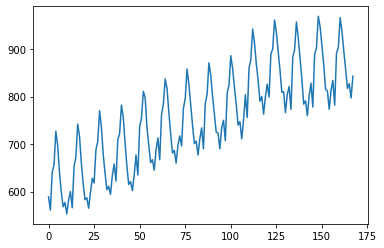

In [7]:
df.y.plot()

It is clearly seen that the data is seasonal and non stationary

In [8]:
from fbprophet import Prophet
#### initialize the model
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [10]:
#### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=12,freq='MS')

In [11]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
175,1976-08-01
176,1976-09-01
177,1976-10-01
178,1976-11-01


In [12]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [13]:
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,577.204108,596.654217,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,536.196545,555.426407,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,630.814214,651.441142,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,649.417353,668.398001,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,711.901978,732.019746,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045


In [14]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1976-08-01,860.512258,849.608895,871.390830
176,1976-09-01,819.273552,808.806030,830.293497
177,1976-10-01,822.995180,811.871492,833.904021
178,1976-11-01,793.949508,783.521927,804.913016
179,1976-12-01,832.303711,820.798706,843.523096


#### Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.


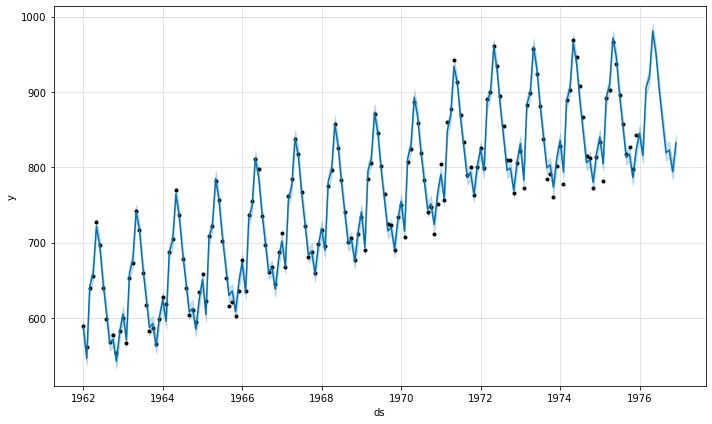

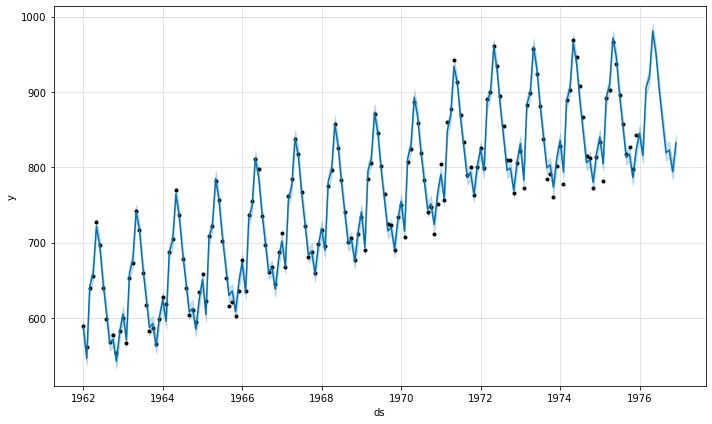

In [15]:
model.plot(prediction)

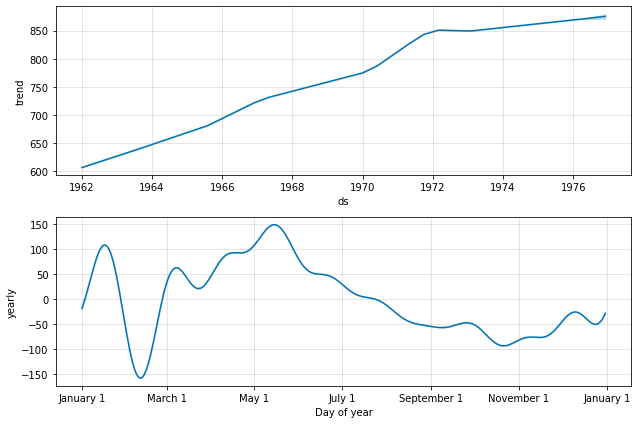

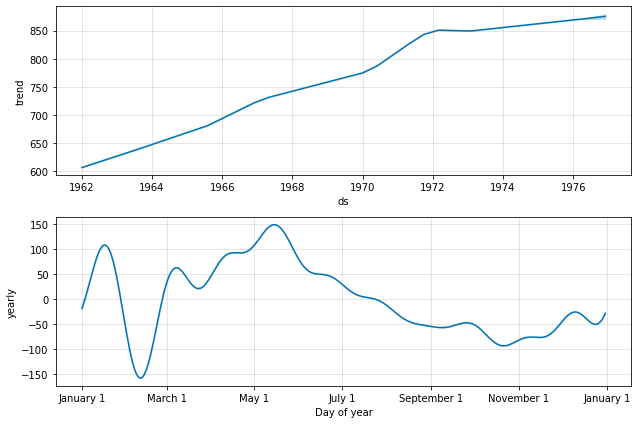

In [16]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(prediction)


### Cross Validation

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

-    horizon the forecast horizon
-    initial the size of the initial training period
-    period the spacing between cutoff dates



In [17]:
df.shape

(168, 2)

In [18]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [19]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,619.087141,617.317251,620.723540,622.0,1965-01-22
1,1965-03-01,697.071986,690.675085,703.014720,709.0,1965-01-22
2,1965-04-01,709.290761,696.021825,722.713369,722.0,1965-01-22
3,1965-05-01,774.436723,753.241827,794.793682,782.0,1965-01-22
4,1965-06-01,742.879282,711.920559,773.298113,756.0,1965-01-22


In [20]:
from fbprophet.diagnostics import performance_metrics
df_perf = performance_metrics(df_cv)

In [21]:
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.28
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.28
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.28
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.28
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.28


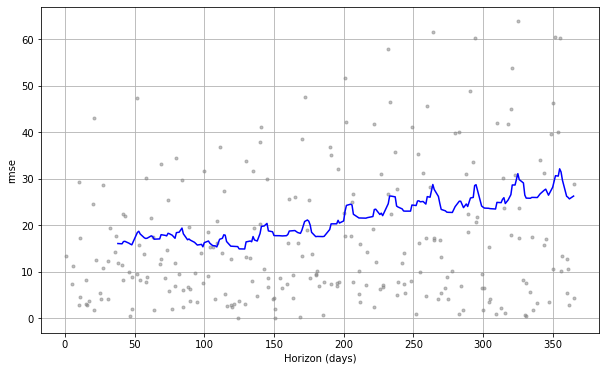

In [22]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')